In [1]:
#Written by ChatGPT

from collections import deque

def heavy_light_decomposition(tree):
    def dfs_size(v, parent):
        subtree_size[v] = 1
        for child in tree[v]:
            if child != parent:
                dfs_size(child, v)
                subtree_size[v] += subtree_size[child]

    def decompose_chain(v, chain_head, parent):
        chain[v] = chain_head
        pos_in_chain[v] = len(chains[chain_head])
        chains[chain_head].append(v)

        max_subtree_size_child = -1
        heavy_child = -1

        for child in tree[v]:
            if child != parent:
                if subtree_size[child] > max_subtree_size_child:
                    max_subtree_size_child = subtree_size[child]
                    heavy_child = child

        if heavy_child != -1:
            decompose_chain(heavy_child, chain_head, v)

        for child in tree[v]:
            if child != parent and child != heavy_child:
                chains.append([])  # Initialize a new chain
                decompose_chain(child, len(chains) - 1, v)

    n = len(tree)
    subtree_size = [0] * n
    chain = [-1] * n
    pos_in_chain = [-1] * n
    chains = [[]]  # Initialize with a single empty chain
    chain_head = 0

    dfs_size(0, -1)
    decompose_chain(0, chain_head, -1)

    return chains

# Example usage:
tree = {
    0: [1, 2],
    1: [3, 4],
    2: [5, 6],
    3: [],
    4: [],
    5: [],
    6: []
}

heavy_chains = heavy_light_decomposition(tree)
for i, chain in enumerate(heavy_chains):
    print(f"Heavy Chain {i}: {chain}")


Heavy Chain 0: [0, 1, 3]
Heavy Chain 1: [4]
Heavy Chain 2: [2, 5]
Heavy Chain 3: [6]


In [23]:
#heavy_light_decomposition(random_trees[10])

In [24]:
import numpy as np

def check_hl_1(random_trees):
    for tree in random_trees:
        heavy_chains = heavy_light_decomposition(tree)
        arr = np.zeros(num_vertices_per_tree)
        for chain in heavy_chains:
            for vertex in chain:
                arr[vertex] += 1
        assert np.max(arr) == 1
        assert np.min(arr) == 1
    return True

In [25]:
check_hl_1(random_trees)

True

In [90]:
def check_hl_2(random_trees):
    for tree in random_trees:
        heavy_chains = heavy_light_decomposition(tree)
        for chain in heavy_chains:
            for vertex in chain:
                num_children = 0
                for child in tree[vertex]:
                    if child in chain:
                        num_children += 1
                assert num_children <= 1
    return True
            

In [91]:
check_hl_2(random_trees)

True

In [51]:
def check_hl_3(random_trees):
    avg_num_intersect = 0
    for tree in tqdm(random_trees):
        heavy_chains = heavy_light_decomposition(tree)
        parents = np.zeros(len(tree))
        for i in range(len(tree)):
            children = tree[i]
            for child in children:
                parents[child] = i
                
        for u in range(len(tree)): #will calculate u^(uparrow T)
            u_ancestors = [u]
            node = int(u)
            while u_ancestors[-1] != 0:
                u_ancestors.append(parents[node])
                node = int(parents[node])
            num_intersect = 0
            for chain in heavy_chains:
                for vertex in chain:
                    if vertex in u_ancestors:
                        num_intersect += 1
                        
            avg_num_intersect += num_intersect
    return avg_num_intersect/(len(random_trees) * len(tree))
            

In [42]:
check_hl_3(random_trees)

5.17854

In [93]:
#Written by ChatGPT

import random

def generate_random_tree(num_vertices):
    tree = [[] for _ in range(num_vertices)]
    for i in range(1, num_vertices):
        parent = random.randint(0, i - 1)
        tree[parent].append(i)
    return tree

# Example usage:
num_trees = 1000
num_vertices_per_tree = 100  # You can adjust the number of vertices per tree
random_trees = [generate_random_tree(num_vertices_per_tree) for _ in range(num_trees)]

In [52]:
def check_hl(random_trees):
    b1 = check_hl_1(random_trees)
    print('Done with check 1')
    b2 = check_hl_2(random_trees)
    print('Done with check 2')
    f = check_hl_3(random_trees)
    if b1 == True and b2 == True:
        return f
    else:
        raise ValueError('Check failed')

In [50]:
from tqdm import tqdm

In [96]:
num_vertices = [10, 25, 50, 75, 100, 250, 500, 750, 1000, 1500, 2000, 2500]
floats = []
for num_vertices_per_tree in num_vertices:
    random_trees = [generate_random_tree(num_vertices_per_tree) for _ in range(num_trees)]
    floats.append(check_hl(random_trees))
    print(f'Done with {num_vertices_per_tree}')

Done with check 1
Done with check 2


100%|██████████| 1000/1000 [00:00<00:00, 34361.52it/s]


Done with 10
Done with check 1
Done with check 2


100%|██████████| 1000/1000 [00:00<00:00, 8198.42it/s]

Done with 25


Done with check 1
Done with check 2


100%|██████████| 1000/1000 [00:00<00:00, 2369.31it/s]


Done with 50
Done with check 1
Done with check 2


100%|██████████| 1000/1000 [00:00<00:00, 1078.80it/s]


Done with 75
Done with check 1
Done with check 2


100%|██████████| 1000/1000 [00:01<00:00, 613.42it/s]


Done with 100
Done with check 1
Done with check 2


100%|██████████| 1000/1000 [00:10<00:00, 94.36it/s]


Done with 250
Done with check 1
Done with check 2


100%|██████████| 1000/1000 [00:45<00:00, 22.07it/s]


Done with 500
Done with check 1
Done with check 2


100%|██████████| 1000/1000 [01:46<00:00,  9.37it/s]


Done with 750
Done with check 1
Done with check 2


100%|██████████| 1000/1000 [03:13<00:00,  5.16it/s]


Done with 1000
Done with check 1
Done with check 2


100%|██████████| 1000/1000 [07:33<00:00,  2.20it/s]


Done with 1500
Done with check 1
Done with check 2


100%|██████████| 1000/1000 [13:49<00:00,  1.21it/s]


Done with 2000
Done with check 1
Done with check 2


100%|██████████| 1000/1000 [22:05<00:00,  1.33s/it]

Done with 2500


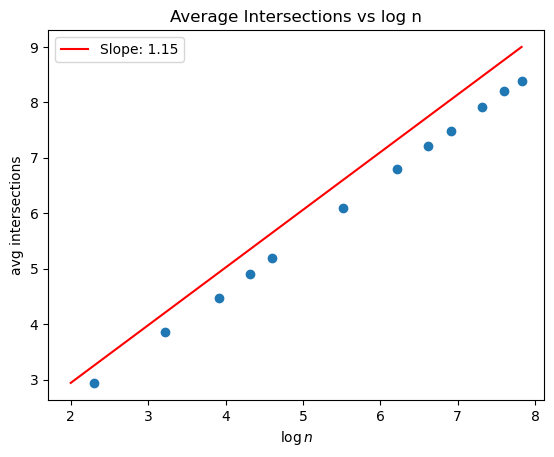

In [108]:
import matplotlib.pyplot as plt
plt.scatter(np.log(num_vertices), floats)
plt.xlabel(rf'$\log n$')
plt.ylabel('avg intersections')
plt.title('Average Intersections vs log n')
slope = 1.15
plt.plot([2, np.log(num_vertices[-1])], [floats[0], slope * np.log(num_vertices[-1])], color='red', linestyle='-', label=f'Slope: {slope}')
plt.legend()
plt.show()

In [109]:
np.round(floats/np.log(num_vertices), 3)

array([1.276, 1.196, 1.144, 1.134, 1.126, 1.103, 1.092, 1.09 , 1.084,
       1.081, 1.079, 1.072])

In [136]:
import time

def time_hl(num_vertices):
    num_trees = 2000
    avg_times = []
    for n in num_vertices:
        avg_time = 0
        random_trees = [generate_random_tree(n) for _ in range(num_trees)]
        for tree in tqdm(random_trees):
            start = time.time()
            chains = heavy_light_decomposition(tree)
            end = time.time()
            avg_time = avg_time + end - start
        avg_times.append(avg_time/num_trees)
        print(f'Done with {n} vertices')
    return avg_times

In [137]:
num_vertices = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
durations = time_hl(num_vertices)

100%|██████████| 2000/2000 [00:01<00:00, 1296.72it/s]


Done with 1000 vertices


100%|██████████| 2000/2000 [00:03<00:00, 629.21it/s]


Done with 2000 vertices


100%|██████████| 2000/2000 [00:04<00:00, 418.69it/s]


Done with 3000 vertices


100%|██████████| 2000/2000 [00:07<00:00, 272.98it/s]


Done with 4000 vertices


100%|██████████| 2000/2000 [00:09<00:00, 204.07it/s]


Done with 5000 vertices


100%|██████████| 2000/2000 [00:11<00:00, 170.19it/s]


Done with 6000 vertices


100%|██████████| 2000/2000 [00:13<00:00, 147.15it/s]


Done with 7000 vertices


100%|██████████| 2000/2000 [00:15<00:00, 130.56it/s]


Done with 8000 vertices


100%|██████████| 2000/2000 [00:18<00:00, 109.83it/s]


Done with 9000 vertices


100%|██████████| 2000/2000 [00:19<00:00, 100.99it/s]

Done with 10000 vertices


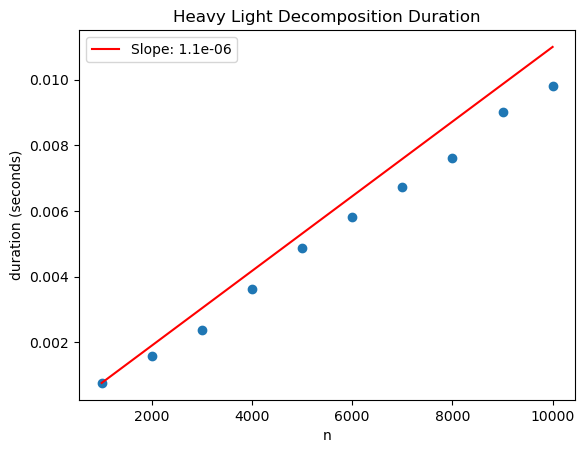

In [165]:
plt.scatter(num_vertices, np.array(durations))
slope = 1.1e-6
plt.plot([1000, num_vertices[-1]], [durations[0], slope * num_vertices[-1]], color='red', linestyle='-', label=f'Slope: {slope}')
plt.legend()
plt.xlabel('n')
plt.ylabel('duration (seconds)')
plt.title('Heavy Light Decomposition Duration')
plt.show()

## Rooted Trees

In [6]:
#Written by ChatGPT

from collections import defaultdict

class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

def build_balanced_bst(vertices):
    def build_bst(left, right):
        if left > right:
            return None

        mid = (left + right) // 2
        root = TreeNode(vertices[mid])
        root.left = build_bst(left, mid - 1)
        root.right = build_bst(mid + 1, right)

        return root

    n = len(vertices)
    return build_bst(0, n - 1)

def construct_tree_from_decomposition(tree, heavy_chains):
    path_to_bst = {}
    for chain_id, chain in enumerate(heavy_chains):
        vertices = []

        # Extract vertices for the chain
        for vertex in chain:
            vertices.append(vertex)

        # Build a balanced BST for the chain
        bst = build_balanced_bst(vertices)

        # Store the BST for the chain
        path_to_bst[chain_id] = bst

    return path_to_bst

def print_bst(root):
    if root:
        print_bst(root.left)
        print(root.val)
        print_bst(root.right)


# Example usage:
tree = {
    0: [1, 2],
    1: [3, 4],
    2: [5, 6],
    3: [7, 8],
    4: [],
    5: [9, 10],
    6: [],
    7: [],
    8: [11],
    9: [],
    10: [],
    11: []
}

heavy_chains = heavy_light_decomposition(tree)
path_to_bst = construct_tree_from_decomposition(tree, heavy_chains)

# Now you can access the balanced BSTs for each chain using path_to_bst
for chain_id, bst in path_to_bst.items():
    print(f"BST for Chain {chain_id}:")
    print_bst(bst)



BST for Chain 0:
0
1
3
8
11
BST for Chain 1:
7
BST for Chain 2:
4
BST for Chain 3:
2
5
9
BST for Chain 4:
10
BST for Chain 5:
6
